In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


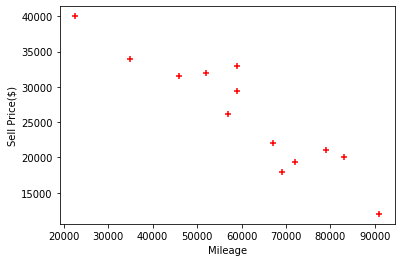

In [87]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df[['Mileage']], df['Sell Price($)'], color='red', marker='+')

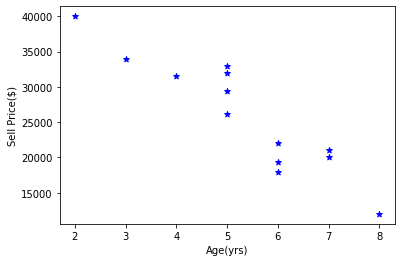

In [86]:
%matplotlib inline
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(df[['Age(yrs)']], df['Sell Price($)'], color='blue', marker='*')

In [58]:
X = df.values

In [59]:
X

array([['BMW X5', 69000, 18000, 6],
       ['BMW X5', 35000, 34000, 3],
       ['BMW X5', 57000, 26100, 5],
       ['BMW X5', 22500, 40000, 2],
       ['BMW X5', 46000, 31500, 4],
       ['Audi A5', 59000, 29400, 5],
       ['Audi A5', 52000, 32000, 5],
       ['Audi A5', 72000, 19300, 6],
       ['Audi A5', 91000, 12000, 8],
       ['Mercedez Benz C class', 67000, 22000, 6],
       ['Mercedez Benz C class', 83000, 20000, 7],
       ['Mercedez Benz C class', 79000, 21000, 7],
       ['Mercedez Benz C class', 59000, 33000, 5]], dtype=object)

In [60]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
en = ohe.fit_transform(X[:,:1]).toarray()

In [61]:
en

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [62]:
en = en[:,1:]

In [63]:
en

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [64]:
X[:,1:]

array([[69000, 18000, 6],
       [35000, 34000, 3],
       [57000, 26100, 5],
       [22500, 40000, 2],
       [46000, 31500, 4],
       [59000, 29400, 5],
       [52000, 32000, 5],
       [72000, 19300, 6],
       [91000, 12000, 8],
       [67000, 22000, 6],
       [83000, 20000, 7],
       [79000, 21000, 7],
       [59000, 33000, 5]], dtype=object)

In [65]:
merged = np.concatenate((X[:,1:],en), axis=1)

In [66]:
merged

array([[69000, 18000, 6, 1.0, 0.0],
       [35000, 34000, 3, 1.0, 0.0],
       [57000, 26100, 5, 1.0, 0.0],
       [22500, 40000, 2, 1.0, 0.0],
       [46000, 31500, 4, 1.0, 0.0],
       [59000, 29400, 5, 0.0, 0.0],
       [52000, 32000, 5, 0.0, 0.0],
       [72000, 19300, 6, 0.0, 0.0],
       [91000, 12000, 8, 0.0, 0.0],
       [67000, 22000, 6, 0.0, 1.0],
       [83000, 20000, 7, 0.0, 1.0],
       [79000, 21000, 7, 0.0, 1.0],
       [59000, 33000, 5, 0.0, 1.0]], dtype=object)

In [71]:
X = np.concatenate((merged[:,:1],merged[:,2:]), axis=1)
y = merged[:,1]

In [72]:
X

array([[69000, 6, 1.0, 0.0],
       [35000, 3, 1.0, 0.0],
       [57000, 5, 1.0, 0.0],
       [22500, 2, 1.0, 0.0],
       [46000, 4, 1.0, 0.0],
       [59000, 5, 0.0, 0.0],
       [52000, 5, 0.0, 0.0],
       [72000, 6, 0.0, 0.0],
       [91000, 8, 0.0, 0.0],
       [67000, 6, 0.0, 1.0],
       [83000, 7, 0.0, 1.0],
       [79000, 7, 0.0, 1.0],
       [59000, 5, 0.0, 1.0]], dtype=object)

In [73]:
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=object)

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
trained_model = model.fit(X, y)

In [78]:
trained_model.predict([[45000,4,0,1]])

array([36991.31721061])

In [77]:
trained_model.predict([[86000,7,1,0]])

array([11080.74313219])

In [79]:
trained_model.score(X, y)

0.9417050937281083

1. Price of a mercedez benz that is 4yrs old with mileage 45000 = USD36991.32
2. Price of a BMW X5 that is 7yrs old with mileage 86000 = USD11080.74
3. Accuracy of the model 0.94